In [1]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

2025-04-25 13:53:42.938815: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 13:53:43.316344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745560423.453452  648912 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745560423.496124  648912 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745560423.809610  648912 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [ ]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 1e-4
args['n_iterations'] = 10000

lines = open(args['problem'], 'r').readlines()
args['lines'] = ['(param A point)', '(param B point)', '(define AB line (line A B))', '(param C point)', '(param D point)', '(define CD line (line C D))', '(assert (para AB CD))', '(param F point (on-line CD))', '(define E point (foot F AB))', '(define EF line (line E F))', '(assert (perp EF AB))', '(param M point (on-line CD))', '(define EM line (line E M))', '(assert (= (uangle D M E) (div (mul 55 pi) 180)))']

args['lines']

['(param A point)',
 '(param B point)',
 '(define AB line (line A B))',
 '(param C point)',
 '(param D point)',
 '(define CD line (line C D))',
 '(assert (para AB CD))',
 '(param F point (on-line CD))',
 '(define E point (foot F AB))',
 '(define EF line (line E F))',
 '(assert (perp EF AB))',
 '(param M point (on-line CD))',
 '(define EM line (line E M))',
 '(assert (= (dist A B) 10))',
 '(assert (= (uangle D M E) (div (mul 55 pi) 180)))']

INPUT INSTRUCTIONS:
parameterize A coords
parameterize B coords
define AB ((connecting A B))
parameterize C coords
parameterize D coords
define CD ((connecting C D))
assert (para AB CD)
parameterize F (on-line CD)
define E ((foot F AB))
define EF ((connecting E F))
assert (perp EF AB)
parameterize M (on-line CD)
define EM ((connecting E M))
assert (eq-n (dist A B) 10.0)
assert (eq-n (uangle D M E) (div (mul 55.0 3.141592653589793) 180.0))


2025-04-25 13:53:53.681202: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
Processing instructions...:   0%|          | 0/15 [00:00<?, ?it/s]

Sampling initializations...:   0%|          | 0/10 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1745560437.530686  648912 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
Sampling initializations...: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]


[     0]  68.452868220968 ||   0.100000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.2919546052
  F_line_regularization                              0.0001045486
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002434249
  eq-n_(dist A B)_10.0                               68.4528682210
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.5037603796
  points                                             0.0000074077
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


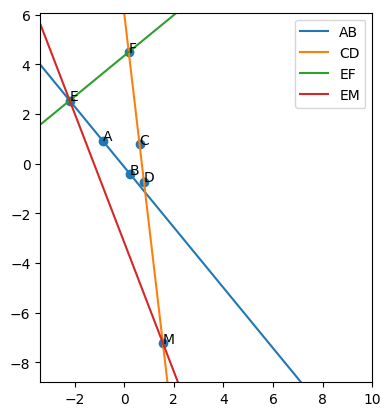

[   100]   0.462004798857 ||   0.096496
[   200]   0.000452403836 ||   0.093115
[   300]   0.000519217673 ||   0.089852
[   400]   0.000430493105 ||   0.086704
[   500]   0.000427922741 ||   0.083666
[   600]   0.000425627716 ||   0.080734
[   700]   0.000422563280 ||   0.077906
[   800]   0.000420161252 ||   0.075176
[   900]   0.000417515976 ||   0.072542
[  1000]   0.000610507292 ||   0.070000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0004501166
  F_line_regularization                              0.0002751595
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0004114350
  eq-n_(dist A B)_10.0                               0.0002259186
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0006105073
  points                                             0.0000277570
  distinct                                           0.0000000000
-- Goals --
-- N

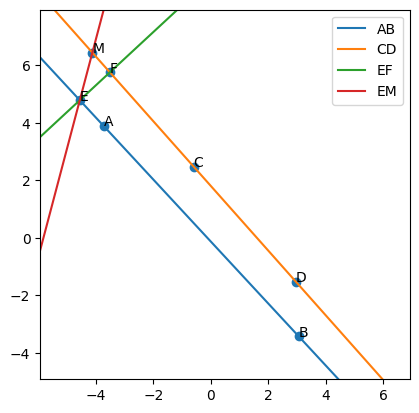

[  1100]   0.000409805695 ||   0.067547
[  1200]   0.000414101175 ||   0.065180
[  1300]   0.000675994246 ||   0.062897
[  1400]   0.000396908076 ||   0.060693
[  1500]   0.000392953458 ||   0.058566
[  1600]   0.000928279212 ||   0.056514
[  1700]   0.000386837408 ||   0.054534
[  1800]   0.000381664819 ||   0.052623
[  1900]   0.000377562693 ||   0.050779
[  2000]   0.000373157394 ||   0.049000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0002793910
  F_line_regularization                              0.0002362008
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0003731574
  eq-n_(dist A B)_10.0                               0.0002292081
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000010414
  points                                             0.0000266495
  distinct                                           0.0000000000
-- Goals --
-- N

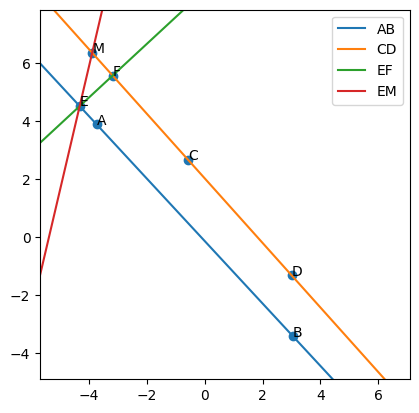

[  2100]   0.000370071798 ||   0.047283
[  2200]   0.000363409140 ||   0.045626
[  2300]   0.000358644037 ||   0.044028
[  2400]   0.000440959544 ||   0.042485
[  2500]   0.000349976399 ||   0.040996
[  2600]   0.000345787605 ||   0.039560
[  2700]   0.000340383726 ||   0.038174
[  2800]   0.000465502597 ||   0.036836
[  2900]   0.000328945130 ||   0.035545
[  3000]   0.000325180928 ||   0.034300
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0002881690
  F_line_regularization                              0.0001991712
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0003251809
  eq-n_(dist A B)_10.0                               0.0002305692
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000171514
  points                                             0.0000252658
  distinct                                           0.0000000052
-- Goals --
-- N

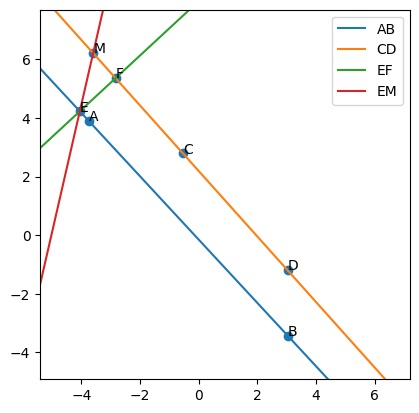

[  3100]   0.000319290203 ||   0.033098
[  3200]   0.000313902606 ||   0.031938
[  3300]   0.000309487120 ||   0.030819
[  3400]   0.000305346335 ||   0.029739
[  3500]   0.000302639675 ||   0.028697
[  3600]   0.000296098184 ||   0.027692
[  3700]   0.000291459622 ||   0.026722
[  3800]   0.000288267581 ||   0.025785
[  3900]   0.000284019759 ||   0.024882
[  4000]   0.000280169671 ||   0.024010
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0001799004
  F_line_regularization                              0.0001673588
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002801697
  eq-n_(dist A B)_10.0                               0.0002319123
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000727147
  points                                             0.0000238172
  distinct                                           0.0000197352
-- Goals --
-- N

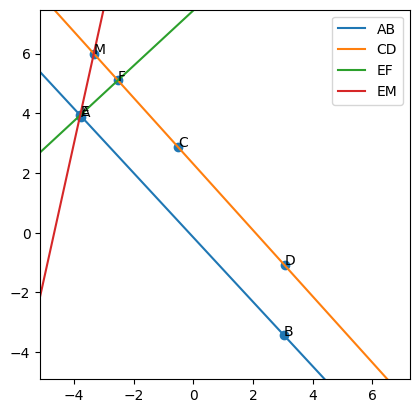

[  4100]   0.000276619475 ||   0.023169
[  4200]   0.000272392504 ||   0.022357
[  4300]   0.000266276185 ||   0.021574
[  4400]   0.000264060998 ||   0.020818
[  4500]   0.000260484356 ||   0.020088
[  4600]   0.000254795149 ||   0.019384
[  4700]   0.000252613531 ||   0.018705
[  4800]   0.000249999791 ||   0.018050
[  4900]   0.000283577705 ||   0.017417
[  5000]   0.000241091702 ||   0.016807
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000998530
  F_line_regularization                              0.0001432932
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002410917
  eq-n_(dist A B)_10.0                               0.0002327893
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000193662
  points                                             0.0000225089
  distinct                                           0.0000008142
-- Goals --
-- N

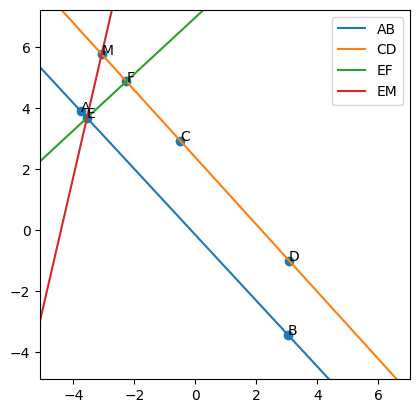

[  5100]   0.000239227598 ||   0.016218
[  5200]   0.000236337399 ||   0.015650
[  5300]   0.000232689005 ||   0.015101
[  5400]   0.000227544441 ||   0.014572
[  5500]   0.000225476685 ||   0.014062
[  5600]   0.000223976725 ||   0.013569
[  5700]   0.000219122679 ||   0.013094
[  5800]   0.000216870850 ||   0.012635
[  5900]   0.000215218989 ||   0.012192
[  6000]   0.000211228219 ||   0.011765
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0001733583
  F_line_regularization                              0.0001239272
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002112282
  eq-n_(dist A B)_10.0                               0.0000217259
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000976152
  points                                             0.0000213487
  distinct                                           0.0000000000
-- Goals --
-- N

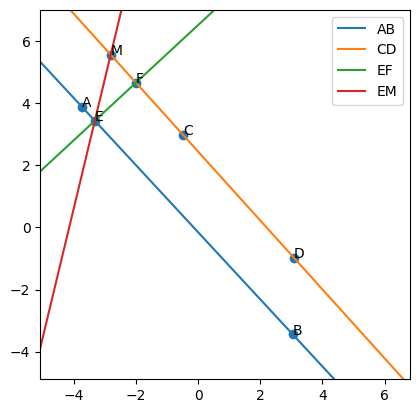

[  6100]   0.000208443277 ||   0.011353
[  6200]   0.000206666949 ||   0.010955
[  6300]   0.000203779457 ||   0.010571
[  6400]   0.000201207600 ||   0.010201
[  6500]   0.000199545367 ||   0.009843
[  6600]   0.000218862743 ||   0.009498
[  6700]   0.000194636620 ||   0.009166
[  6800]   0.000194246033 ||   0.008844
[  6900]   0.000192438756 ||   0.008534
[  7000]   0.000217193447 ||   0.008235
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0001304914
  F_line_regularization                              0.0001074774
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001909091
  eq-n_(dist A B)_10.0                               0.0000218481
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0002171934
  points                                             0.0000202972
  distinct                                           0.0000000000
-- Goals --
-- N

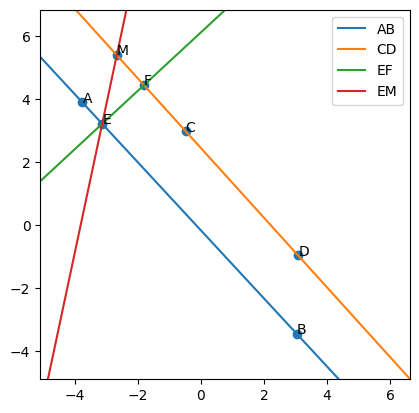

[  7100]   0.000187073878 ||   0.007947
[  7200]   0.000189905360 ||   0.007668
[  7300]   0.000184587884 ||   0.007400
[  7400]   0.000183134905 ||   0.007140
[  7500]   0.000179674917 ||   0.006890
[  7600]   0.000177739011 ||   0.006649
[  7700]   0.000177749410 ||   0.006416
[  7800]   0.000176160442 ||   0.006191
[  7900]   0.000173397210 ||   0.005974
[  8000]   0.000171062612 ||   0.005765
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000628526
  F_line_regularization                              0.0000976007
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001710626
  eq-n_(dist A B)_10.0                               0.0000221478
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000101830
  points                                             0.0000194913
  distinct                                           0.0000000000
-- Goals --
-- N

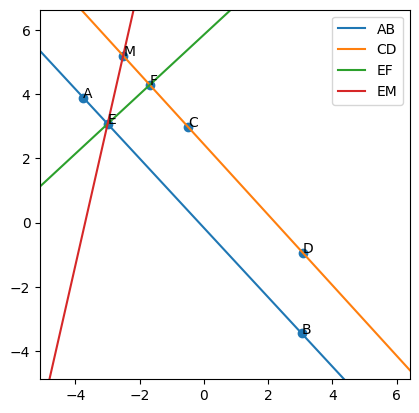

[  8100]   0.000170785755 ||   0.005563
[  8200]   0.000184299312 ||   0.005368
[  8300]   0.000166938926 ||   0.005180
[  8400]   0.000166342915 ||   0.004998
[  8500]   0.000163473164 ||   0.004823
[  8600]   0.000162915326 ||   0.004654
[  8700]   0.000159975094 ||   0.004491
[  8800]   0.000158955049 ||   0.004334
[  8900]   0.000159161869 ||   0.004182
[  9000]   0.000156947602 ||   0.004035
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000615953
  F_line_regularization                              0.0000884864
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001569476
  eq-n_(dist A B)_10.0                               0.0000223178
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000053461
  points                                             0.0000187498
  distinct                                           0.0000000000
-- Goals --
-- N

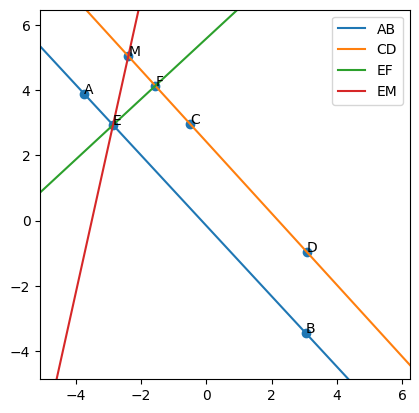

[  9100]   0.000154385361 ||   0.003894
[  9200]   0.000153599128 ||   0.003758
[  9300]   0.000153798448 ||   0.003626
[  9400]   0.000151639924 ||   0.003499
[  9500]   0.000150452218 ||   0.003376
[  9600]   0.000149185115 ||   0.003258
[  9700]   0.000148748588 ||   0.003144
[  9800]   0.000146598182 ||   0.003034
[  9900]   0.000144969681 ||   0.002927
[     0]  79.349740939752 ||   0.100000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.6211261719
  F_line_regularization                              0.0002881651
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0000926140
  eq-n_(dist A B)_10.0                               79.3497409398
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0018783893
  points                                             0.0000070927
  distinct                                           0.0000000000
-- Goals --
-- 

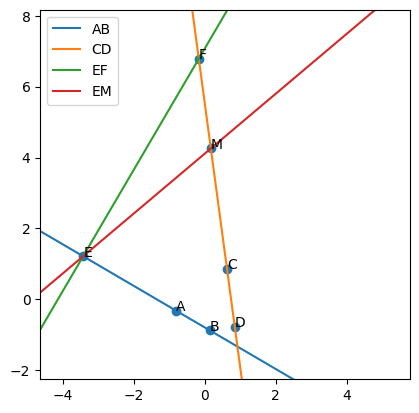

[   100]   0.000321112505 ||   0.096496
[   200]   0.000317543377 ||   0.093115
[   300]   0.000312310598 ||   0.089852
[   400]   0.000310938931 ||   0.086704
[   500]   0.000304672386 ||   0.083666
[   600]   0.000301353834 ||   0.080734
[   700]   0.000296387739 ||   0.077906
[   800]   0.000293153162 ||   0.075176
[   900]   0.000287795663 ||   0.072542
[  1000]   0.000281342065 ||   0.070000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000055550
  F_line_regularization                              0.0001757234
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002813421
  eq-n_(dist A B)_10.0                               0.0000285864
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0001529351
  points                                             0.0000198444
  distinct                                           0.0000000000
-- Goals --
-- N

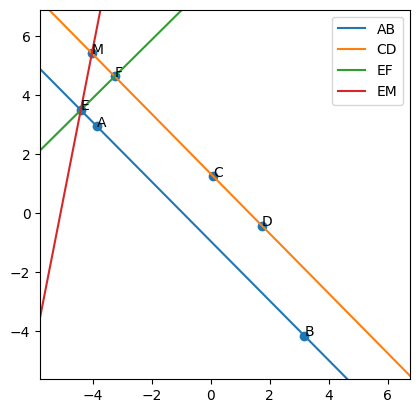

[  1100]   0.000280397962 ||   0.067547
[  1200]   0.000273569667 ||   0.065180
[  1300]   0.000663098874 ||   0.062897
[  1400]   0.000268252716 ||   0.060693
[  1500]   0.000275522153 ||   0.058566
[  1600]   0.000259105160 ||   0.056514
[  1700]   0.000250807698 ||   0.054534
[  1800]   0.000587967546 ||   0.052623
[  1900]   0.000245078811 ||   0.050779
[  2000]   0.000240460984 ||   0.049000
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000950213
  F_line_regularization                              0.0001406513
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002404610
  eq-n_(dist A B)_10.0                               0.0000279004
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000101295
  points                                             0.0000184812
  distinct                                           0.0000015037
-- Goals --
-- N

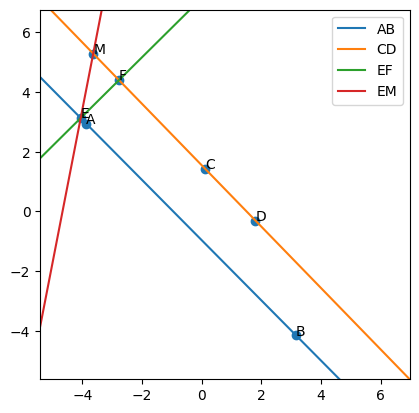

[  2100]   0.000238290163 ||   0.047283
[  2200]   0.000234510118 ||   0.045626
[  2300]   0.000227252794 ||   0.044028
[  2400]   0.000315768626 ||   0.042485
[  2500]   0.000223557355 ||   0.040996
[  2600]   0.000219874421 ||   0.039560
[  2700]   0.000214666501 ||   0.038174
[  2800]   0.000209215036 ||   0.036836
[  2900]   0.000206628280 ||   0.035545
[  3000]   0.000203197544 ||   0.034300
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000092742
  F_line_regularization                              0.0001131685
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0002031975
  eq-n_(dist A B)_10.0                               0.0000272652
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000012941
  points                                             0.0000171827
  distinct                                           0.0000046273
-- Goals --
-- N

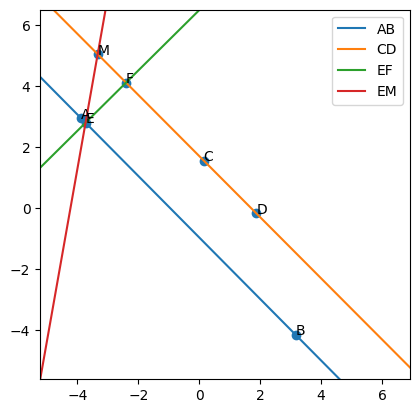

[  3100]   0.000491646751 ||   0.033098
[  3200]   0.000196435600 ||   0.031938
[  3300]   0.000194184237 ||   0.030819
[  3400]   0.000189594003 ||   0.029739
[  3500]   0.000232876093 ||   0.028697
[  3600]   0.000183936645 ||   0.027692
[  3700]   0.000180717763 ||   0.026722
[  3800]   0.000179058182 ||   0.025785
[  3900]   0.000175459249 ||   0.024882
[  4000]   0.000172339523 ||   0.024010
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000106120
  F_line_regularization                              0.0000910277
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001723395
  eq-n_(dist A B)_10.0                               0.0000270942
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000149952
  points                                             0.0000159219
  distinct                                           0.0000000000
-- Goals --
-- N

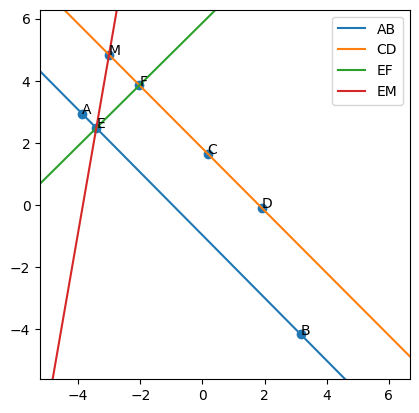

[  4100]   0.000169420643 ||   0.023169
[  4200]   0.000166812507 ||   0.022357
[  4300]   0.000164483562 ||   0.021574
[  4400]   0.000168850379 ||   0.020818
[  4500]   0.000158843074 ||   0.020088
[  4600]   0.000156951906 ||   0.019384
[  4700]   0.000153451095 ||   0.018705
[  4800]   0.000151383671 ||   0.018050
[  4900]   0.000149891032 ||   0.017417
[  5000]   0.000158531894 ||   0.016807
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000053235
  F_line_regularization                              0.0000739286
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001481929
  eq-n_(dist A B)_10.0                               0.0000271248
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0001585319
  points                                             0.0000147687
  distinct                                           0.0000000000
-- Goals --
-- N

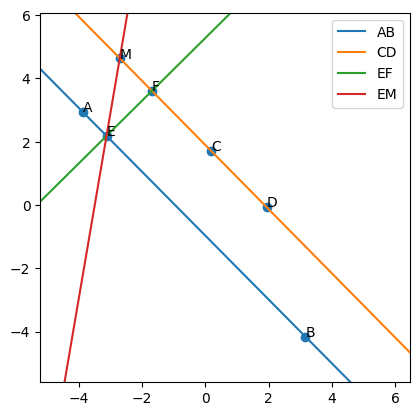

[  5100]   0.000145780809 ||   0.016218
[  5200]   0.000143049485 ||   0.015650
[  5300]   0.000179636787 ||   0.015101
[  5400]   0.000139303493 ||   0.014572
[  5500]   0.000137667777 ||   0.014062
[  5600]   0.000135799094 ||   0.013569
[  5700]   0.000132446649 ||   0.013094
[  5800]   0.000131879845 ||   0.012635
[  5900]   0.000155859713 ||   0.012192
[  6000]   0.000127463244 ||   0.011765
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000889934
  F_line_regularization                              0.0000628427
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001274632
  eq-n_(dist A B)_10.0                               0.0000272406
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000352303
  points                                             0.0000138594
  distinct                                           0.0000000000
-- Goals --
-- N

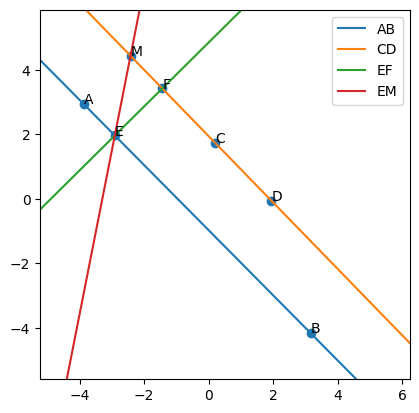

[  6100]   0.000146494153 ||   0.011353
[  6200]   0.000137122546 ||   0.010955
[  6300]   0.000122307034 ||   0.010571
[  6400]   0.000121465039 ||   0.010201
[  6500]   0.000120292509 ||   0.009843
[  6600]   0.000118907884 ||   0.009498
[  6700]   0.000117686879 ||   0.009166
[  6800]   0.000116390497 ||   0.008844
[  6900]   0.000114491881 ||   0.008534
[  7000]   0.000112912451 ||   0.008235
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000026781
  F_line_regularization                              0.0000538022
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001129125
  eq-n_(dist A B)_10.0                               0.0000268287
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000206376
  points                                             0.0000130985
  distinct                                           0.0000000000
-- Goals --
-- N

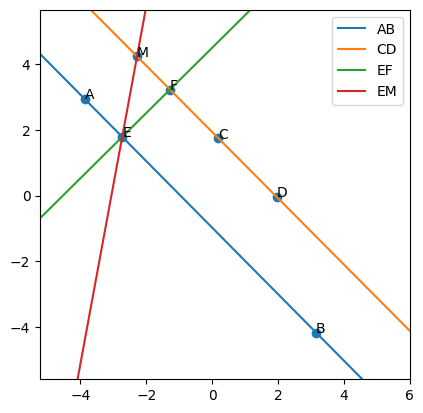

[  7100]   0.000112184482 ||   0.007947
[  7200]   0.000110226054 ||   0.007668
[  7300]   0.000108866832 ||   0.007400
[  7400]   0.000107959373 ||   0.007140
[  7500]   0.000107967509 ||   0.006890
[  7600]   0.000105981737 ||   0.006649
[  7700]   0.000105322887 ||   0.006416
[  7800]   0.000123827441 ||   0.006191
[  7900]   0.000102884511 ||   0.005974
[  8000]   0.000102185488 ||   0.005765
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000854829
  F_line_regularization                              0.0000469323
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0001021855
  eq-n_(dist A B)_10.0                               0.0000263940
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000013970
  points                                             0.0000124701
  distinct                                           0.0000000000
-- Goals --
-- N

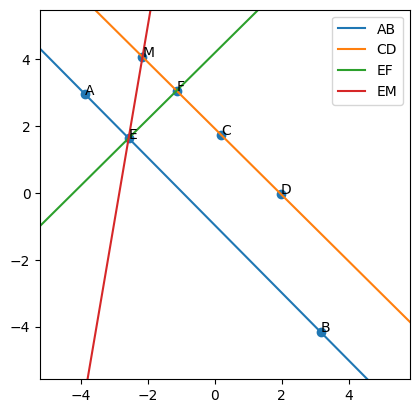

[  8100]   0.000100508619 ||   0.005563
======== Print losses ==========
-- Losses --
  para_AB_CD                                         0.0000124889
  F_line_regularization                              0.0000465158
  perp_EF_AB                                         0.0000000000
  M_line_regularization                              0.0000999475
  eq-n_(dist A B)_10.0                               0.0000266253
  eq-n_(uangle D M E)_(div (mul 55.0 3.141592653589793) 180.0) 0.0000968518
  points                                             0.0000123957
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


Found 1 models


In [4]:
res = build(args)

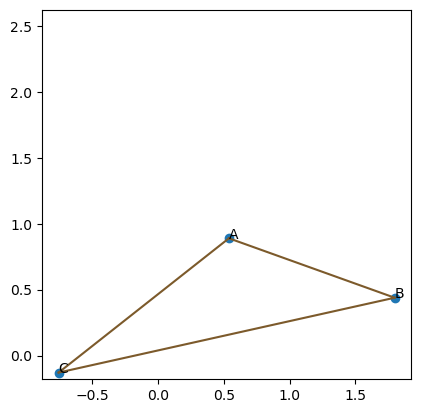

In [17]:
res[1][0].plot()

In [ ]:
for item in res[0]:
    print(item)

(param A point)
(param B point)
(define O point (midp A B))
(define circle_O circle (diam A B))
(param S point (on-ray B A))
(param C point (on-circ circle_O))
(assert (perp (line O C) (line S C)))
(assert (= (uangle B S C) (div pi 6)))


In [ ]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.161407 0.177885)
B
(coords -0.143542 -0.401606)
O
(coords -0.152475 -0.111861)
S
(coords -0.170406 0.469775)
C
(coords -0.407444 0.026063)
circle_O
CircleNF(center=TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), radius=0.2898830659905043)


In [ ]:
for item in res[1][0]:
    print(item)

{<primitives.Point object at 0x000001D8CF331850>: TfPoint(x=-0.1614070837095692, y=0.1778846399813777), <primitives.Point object at 0x000001D8CF3317C0>: TfPoint(x=-0.14354235616820368, y=-0.4016061876441276), <primitives.Point object at 0x000001D8CF3317F0>: TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), <primitives.Point object at 0x000001D8CD94BB50>: TfPoint(x=-0.17040556781690216, y=0.469774846012181), <primitives.Point object at 0x000001D8CD94BF10>: TfPoint(x=-0.4074438697609302, y=0.026062844838812493)}
{}
{<primitives.Circle object at 0x000001D8CD8F0B80>: CircleNF(center=TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), radius=0.2898830659905043)}
[]
[]
[]
[LineNF(n=TfPoint(x=0.4757905336723098, y=0.8795586211662182), r=-0.17093413636496907), LineNF(n=TfPoint(x=-0.8820292568107065, y=0.4711946414486829), r=0.3716580864662685)]
[]
{}
{}
